**Objetivo:**
*indicar se existe dano ou não na estrutura do problema olhando para as informações de aceleração*

In [ ]:
# execute this for the 1st time
# !pip install -r example-requirements.txt

# download file
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # colab

# and place in folder data/

--2024-06-13 10:16:11--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat’

data3SS2009.mat     100%[===================>] 255.24M  23.9MB/s    in 11s     

2024-06-13 10:16:23 (22.3 MB/s) - ‘data3SS2009.mat’ saved [267634147/267634147]



In [ ]:
import scipy.io as sio
import numpy as np
import os
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt

In [ ]:

fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)  # vetor de labels (50 experimentos * 17 estados)
print(N, Chno, Nc)
# y

8192 5 850


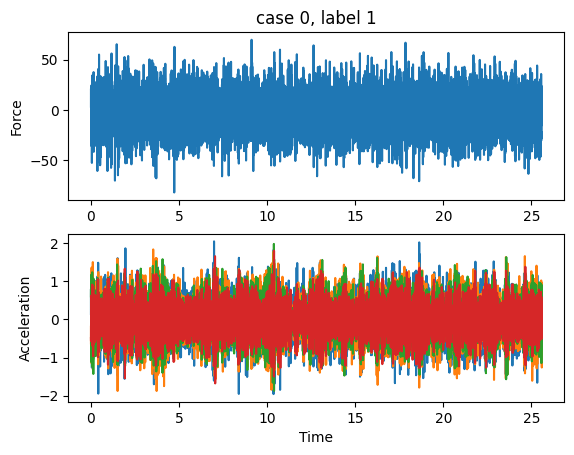

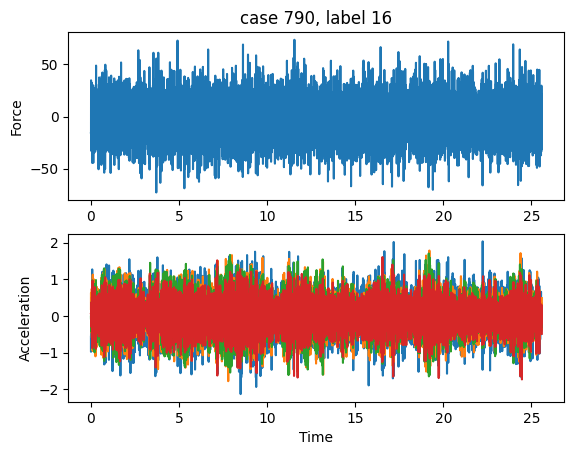

In [ ]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [ ]:
print(Ch2.shape)

(8192, 850)


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

na = 30
res1_list = []
res2_list = []
res3_list = []
res4_list = []
for i in range(Nc):
    res1 = AutoReg(Ch2[:,i], lags=na, trend='n').fit()
    res2 = AutoReg(Ch2[:,i], lags=na, trend='n').fit()
    res3 = AutoReg(Ch2[:,i], lags=na, trend='n').fit()
    res4 = AutoReg(Ch2[:,i], lags=na, trend='n').fit()
    res1_list.append(res1.params)
    res2_list.append(res2.params)
    res3_list.append(res3.params)
    res4_list.append(res4.params)


res1 = np.array(res1_list)
res2 = np.array(res2_list)
res3 = np.array(res3_list)
res4 = np.array(res4_list)

X1 = np.concatenate([res1, res2, res3, res4], axis=1)

X1.shape

(850, 120)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2 = pca.fit_transform(X1)

X2.shape

(850, 2)

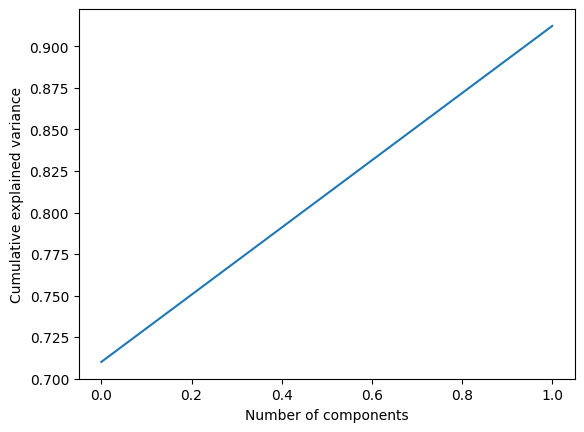

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Starndarsclae in sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1)) #todos os dados estão entre [-1 e 1]
X2_scaled = scaler.fit_transform(X2)

X2_scaled[0,:]

Separação de dados treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.33, random_state=42)

Regressão somente para teste

In [ ]:
from sklearn.linear_model import LogisticRegression

model = logistic = LogisticRegression(max_iter=500) #hiper parâmetros aleatórios, somente para entendermos agora
model.fit(X2, y_target)

yhat = model.predict(X2)

Plot confusion matrix

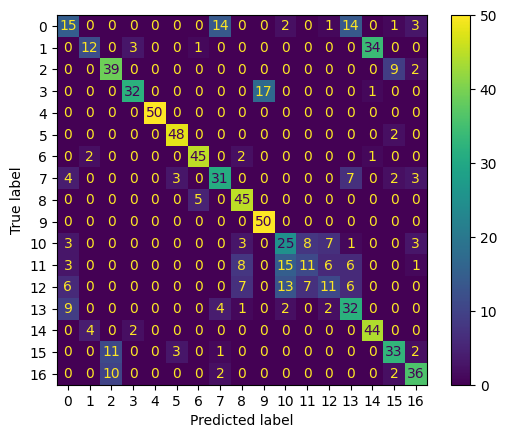

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, yhat)  # colocar y_target
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

SVC example

In [ ]:
from sklearn import svm, SVC

model_svc = SVC()
model_svc.fit(X2_scaled, y_target

yhat_svc = model_svc.predict(X2_scaled)

cm = confusion_matrix(y_target, yhat_svc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

array([0, 1])

# **Aula 03 - SVM e KNN models**


In [ ]:
from sklearn import svm

modl_knn
clf = svm.SVC(random_state=0).fit(X, y)
yh = clf.predict(X)


KNN - vizinhos mais próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model.knn = KNeighborsClassifier()
model.knn.fit(X2_scaled, y_target)

yhat_knn = model.knn.predict(X2_scaled)

cm = confusion_matrix(y_target, yhat_knn)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot